# Kelompok 4 Statistika dan Probabolitas
Anggota:
1. Haidar Rafi Aqyla (5027231029)
2. Gallant Damas Hayuaji (5027231037)
3. Muhammad Syahmi Ash Shidqi (5027231085)

# Exploratory Data Analysis (EDA)
Nama dataset yang akan digunakan adalah **Netflix Userbase Dataset**.

# Tujuan Analisis
Tujuan dari analisis ini adalah untuk mengetahui variabel - variabel dari dataset yang mempengaruhi tipe langganan (*subscription type*).


# 1. Menampilkan Dataset

Dataset di atas terdiri dari 2500 baris dan 10 kolom.

Import Library

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

ds = pd.read_csv('Netflix Userbase.csv')

In [12]:
ds

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


Dataset tersebut terdiri dari 2500 baris dan 10 kolom

In [13]:
# Menampilkan 5 data tertinggi
ds.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


Menampilkan 5 data tertinggi dari dataset

In [14]:
# Menampilkan 5 data terendah
ds.tail()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month
2499,2500,Basic,15,13-08-22,12-07-23,United States,35,Female,Smart TV,1 Month


Menampilkan 5 data terendah dari dataset

# 2. Mengidentifikasi Variabel / Data

Menampilkan seluruh variabel dalam dataset

In [15]:
# Menampilkan seluruh variabel / data pada dataset
ds.columns.values.tolist()

['User ID',
 'Subscription Type',
 'Monthly Revenue',
 'Join Date',
 'Last Payment Date',
 'Country',
 'Age',
 'Gender',
 'Device',
 'Plan Duration']

Identifikasi tipe data pada variabel

In [16]:
# Mengidentifikasi tipe data setiap variabel
ds.dtypes

User ID               int64
Subscription Type    object
Monthly Revenue       int64
Join Date            object
Last Payment Date    object
Country              object
Age                   int64
Gender               object
Device               object
Plan Duration        object
dtype: object

Mendeskripsikan setiap variabel dalam dataset

| Variabel          | Deskripsi                                                                                   |
|:------------------|:--------------------------------------------------------------------------------------------|
| User ID           | ID dari pengguna                                                                            |
| Subscription Type | Tipe langganan dari pengguna. Tipe langganan ada tiga, yaitu Basic, Standard, dan Premium.  |
| Monthly Revenue   | Keuntungan yang didapat dari langganan pengguna.                                           |
| Join Date         | Tanggal pengguna mulai berlangganan di Netflix.                                            |
| Last Payment Date | Tanggal pembayaran langganan terakhir pengguna.                                            |
| Country           | Negara yang ditempati oleh pengguna.                                                       |
| Age               | Usia dari pengguna.                                                                         |
| Gender            | Gender dari pengguna.                                                                       |
| Device            | Tipe perangkat yang digunakan oleh pengguna.                                               |
| Plan Duration     | Durasi / lama langganan pengguna.                                                          |                                                       |

Memisah variabel tipe object dengan variabel tipe int64.

Variabel tipe object berupa subcription type (tipe langganan), join date (tanggal bergabung), last payment date (tanggal pembayaran terakhir), country (negara), gender (jenis kelamin), device (perangkat), dan plan duration.

Sedangkan variabel tipe int64 berupa user ID, monthly revenue, dan age (umur).

In [17]:
cat_cols = ds.select_dtypes(include=['object']).columns
num_cols = ds.select_dtypes(include=np.number).columns.tolist()
print("Variabel tipe object:")
print(cat_cols)
print("\nVariabel tipe int64 / numerik:")
print(num_cols)

Variabel tipe object:
Index(['Subscription Type', 'Join Date', 'Last Payment Date', 'Country',
       'Gender', 'Device', 'Plan Duration'],
      dtype='object')

Variabel tipe int64 / numerik:
['User ID', 'Monthly Revenue', 'Age']


Sebelum melakukan Exploratory Data Analysis, mengecek terlebih dahulu apakah ada nilai yang kosong pada setiap variabel.

In [18]:
ds.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

Karena tidak ada yang kosong, maka kita dapat lanjut melakukan Exploratory Data Analysis.

In [19]:
ds.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


# 3. Exploratory Data Analysis

# A. Lama Langganan dan Tipe Langganan
Berikut ini adalah implementasi data lama langganan dan tipe langganan

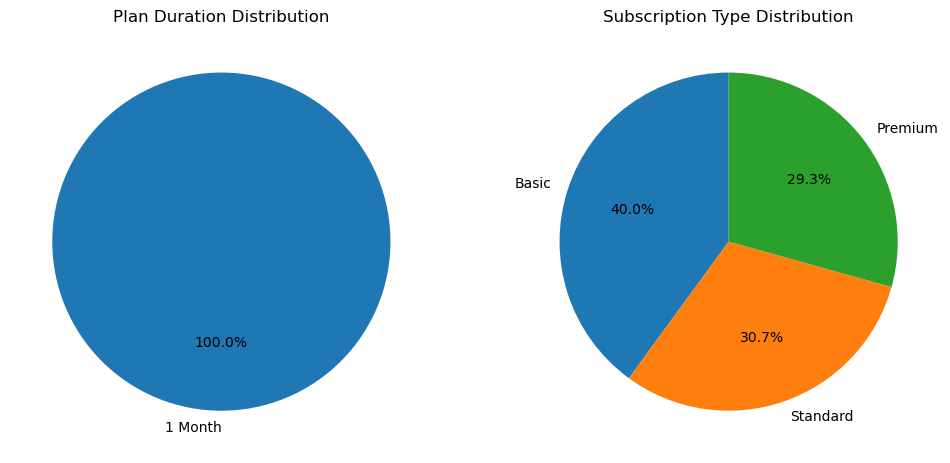

In [20]:
plan_duration = ds["Plan Duration"].value_counts()
subscription_type = ds["Subscription Type"].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(plan_duration, labels=plan_duration.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Plan Duration Distribution')

axes[1].pie(subscription_type, labels=subscription_type.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Subscription Type Distribution')

plt.show()


Dari data di atas dapat disimpulkan bahwa semua pengguna berlangganan Netflix dengan durasi 1 bulan. Tipe langganan dari yang paling banyak adalah tipe basic, standard, dan premium.

# B. Negara
Berikut ini adalah demografi dari data pengguna yang berlangganan Netflix berdasarkan negara.

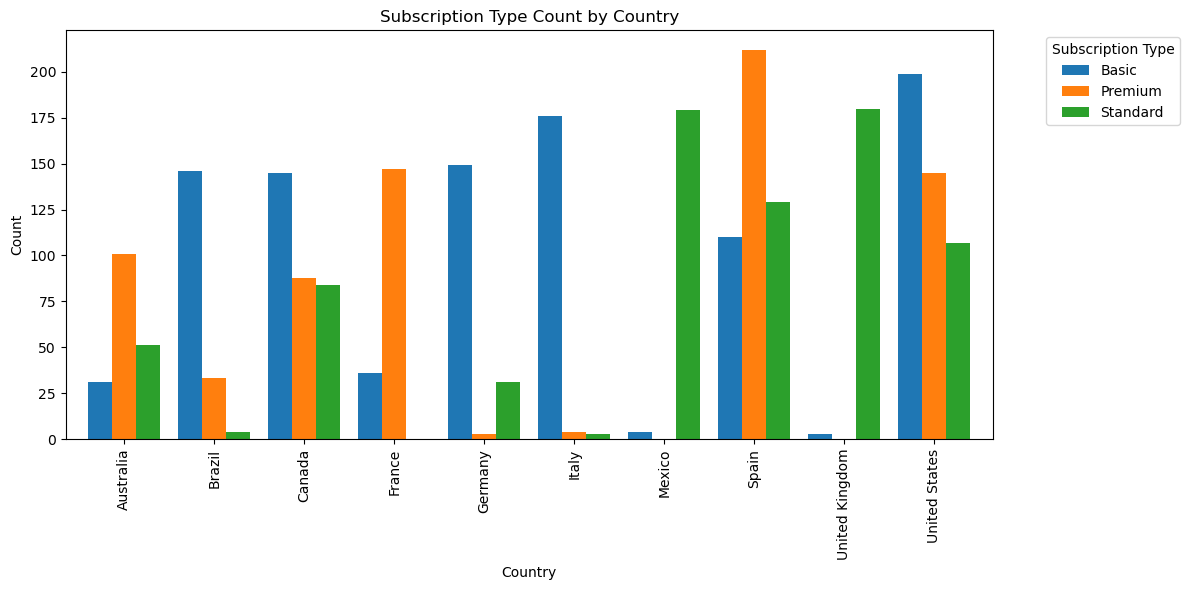

In [29]:
subscription_counts = ds.groupby(['Country', 'Subscription Type']).size().unstack().fillna(0)

subscription_counts.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title('Subscription Type Count by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Subscription Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



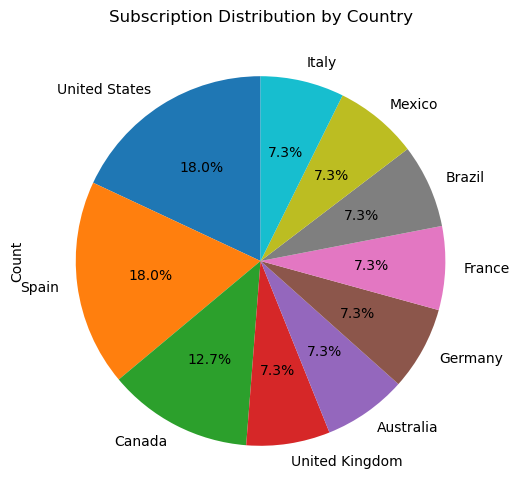

In [28]:
subscription = ds["Country"].value_counts()

subscription.plot(kind='pie', figsize=(12, 6), labels=subscription.index, autopct='%1.1f%%', startangle=90)
plt.title('Subscription Distribution by Country')
plt.ylabel('Count')

plt.show()

Negara yang paling banyak menggunakan Netflix adalah dari Amerika Serikat.

# C. Jenis Kelamin
Berikut ini adalah demografi data pengguna yang berlangganan Netflix berdasarkan jenis kelamin.

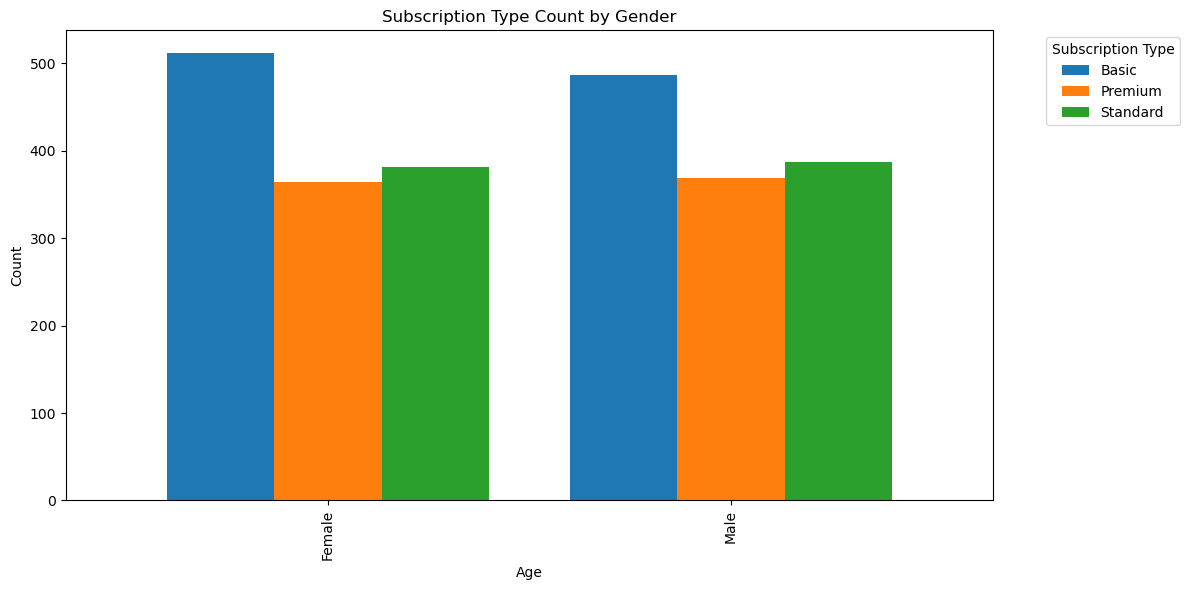

In [22]:
subscription_counts = ds.groupby(['Gender', 'Subscription Type']).size().unstack().fillna(0)

subscription_counts.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title('Subscription Type Count by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Subscription Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Dari demografi tersebut dapat dilihat bahwa tipe langganan basic adalah yang paling banyak digunakan oleh pria dan wanita.

# D. Device / Perangkat

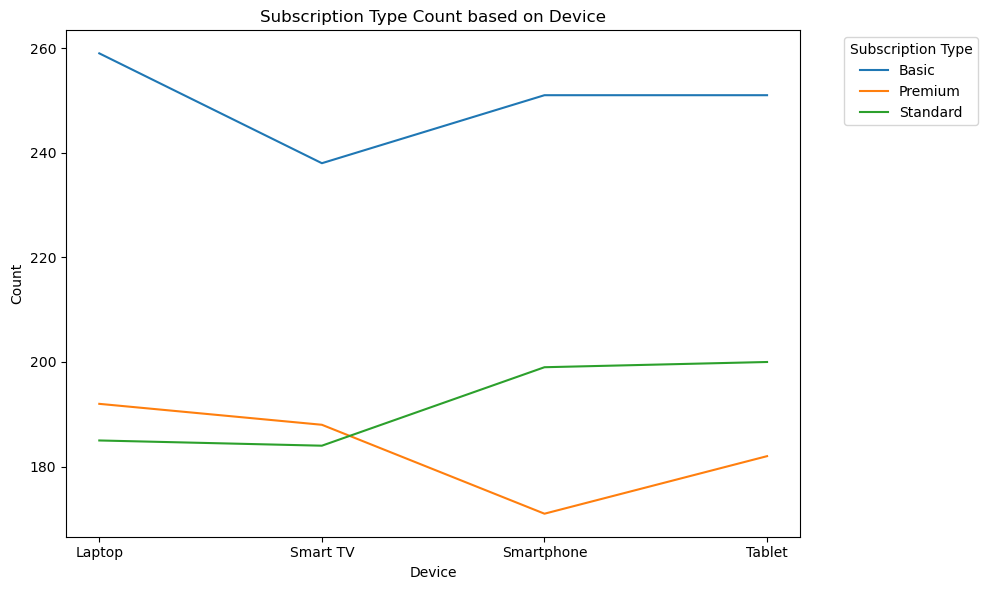

In [25]:
count_data = ds.groupby(['Device', 'Subscription Type']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(10, 6))

for subscription_type in count_data.columns:
    ax.plot(count_data.index, count_data[subscription_type], label=subscription_type)

ax.set_title('Subscription Type Count based on Device')
ax.set_xlabel('Device')
ax.set_ylabel('Count')
ax.legend(title='Subscription Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Dari demografi di atas pengguna laptop dan tipe langganan basic menduduki posisi paling banyak.

# E. Usia

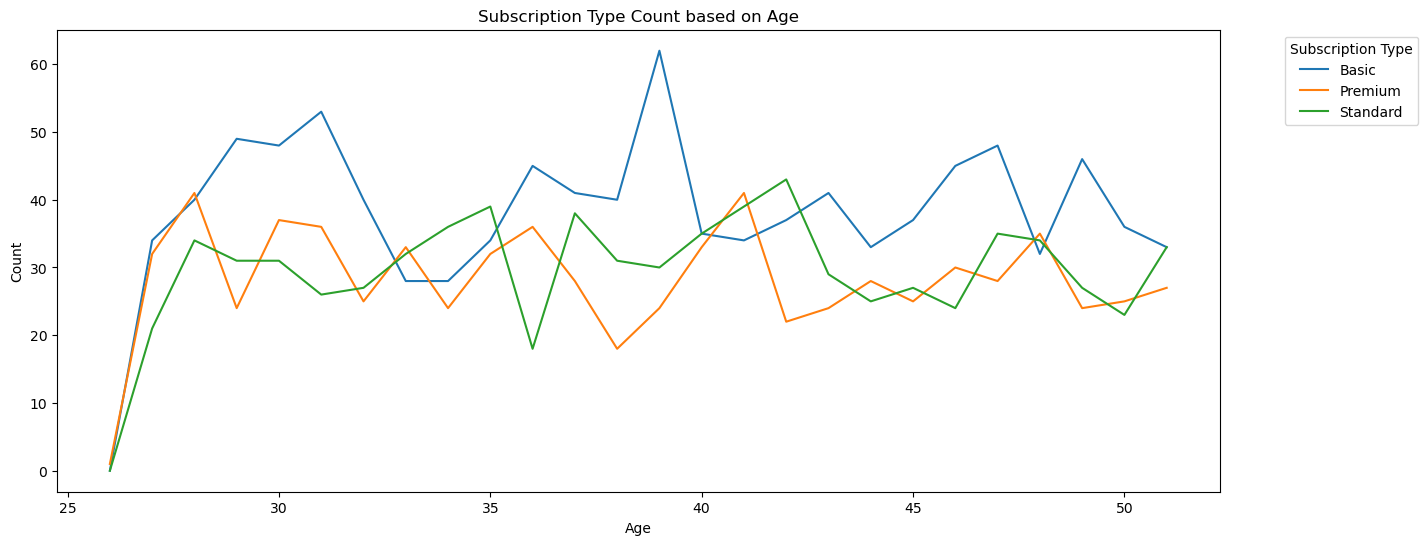

In [26]:
count_data = ds.groupby(['Age', 'Subscription Type']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(15, 6))

for subscription_type in count_data.columns:
    ax.plot(count_data.index, count_data[subscription_type], label=subscription_type)

ax.set_title('Subscription Type Count based on Age')
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.legend(title='Subscription Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Rentang usia 35 sampai 40 tahun paling banyak berlangganan dan tipe langganan basic.

# Kesimpulan
Dari hasil analisis kami, dapat diambil beberapa kesimpulan. Pertama, semua pengguna Netflix berlangganan dengan durasi satu bulan. Kedua, jenis langganan yang paling banyak adalah basic. Ketiga, Amerika Serikat merupakan negara yang paling banyak menggunakan Netflix. Keempat, mayoritas pelanggan Netflix mengakses layanan menggunakan laptop. Kelima, berdasarkan jenis kelamin, perempuan mendominasi sebagai pengguna Netflix. Terakhir, rentang usia 35 hingga 40 tahun menjadi kelompok usia paling banyak sebagai pengguna layanan Netflix. Kesimpulan ini dapat menjadi dasar strategi pemasaran dan pengembangan layanan Netflix di masa depan.